In [10]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist

In [11]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

In [13]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(28*28,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(10, activation='softmax')
])

In [15]:
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
              loss='mean_squared_error',
              metrics=['accuracy'])

In [16]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

predictions = model.predict(x_test)

Epoch 1/20
1500/1500 [==============================] - 7s 4ms/step - loss: 0.0868 - accuracy: 0.2280 - val_loss: 0.0806 - val_accuracy: 0.4168
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0778 - accuracy: 0.3999 - val_loss: 0.0701 - val_accuracy: 0.5541
Epoch 3/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0685 - accuracy: 0.5023 - val_loss: 0.0592 - val_accuracy: 0.6299
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.0609 - accuracy: 0.5616 - val_loss: 0.0521 - val_accuracy: 0.6514
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0559 - accuracy: 0.5911 - val_loss: 0.0479 - val_accuracy: 0.6635
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.0527 - accuracy: 0.6132 - val_loss: 0.0452 - val_accuracy: 0.6690
Epoch 7/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0504 - accuracy: 0.6303 - val_loss: 0.0432 - val_accuracy:

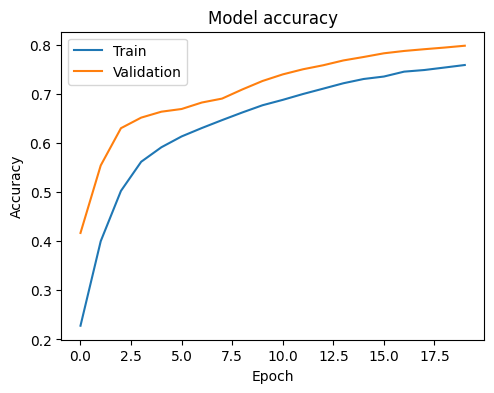

In [17]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

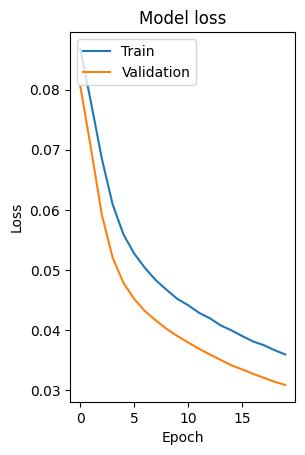

In [18]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()